In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\DO TUAN MINH\Desktop\ben\Learn\Project\demo_data\final.csv')
df=df.drop(columns=['D THU'])
df = df.dropna().reset_index(drop=True)

weekday_columns = ['weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday']
df[weekday_columns] = df[weekday_columns].astype(int)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    313 non-null    object 
 1   weekday_Friday          313 non-null    int32  
 2   weekday_Monday          313 non-null    int32  
 3   weekday_Saturday        313 non-null    int32  
 4   weekday_Sunday          313 non-null    int32  
 5   weekday_Thursday        313 non-null    int32  
 6   weekday_Tuesday         313 non-null    int32  
 7   weekday_Wednesday       313 non-null    int32  
 8   totalprecip_mm          313 non-null    float64
 9   avgvis_km               313 non-null    float64
 10  temp_c                  313 non-null    float64
 11  wind_kph                313 non-null    float64
 12  pressure_in             313 non-null    float64
 13  humidity                313 non-null    int64  
 14  revenue                 313 non-null    fl

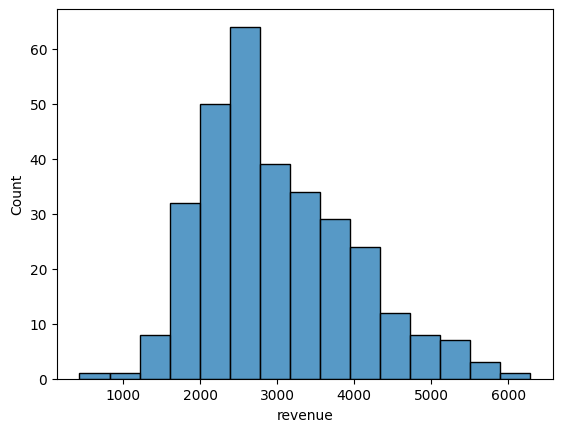

In [4]:
sns.histplot(df['revenue'])
plt.show()

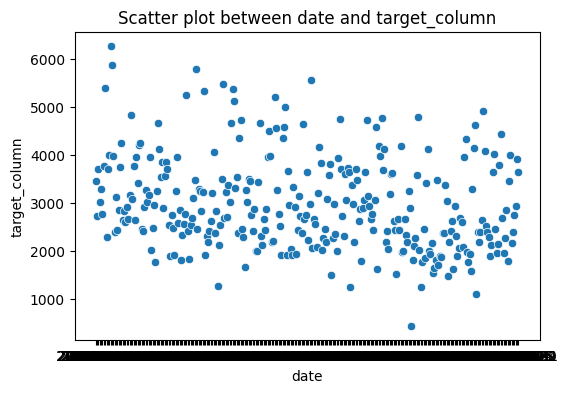

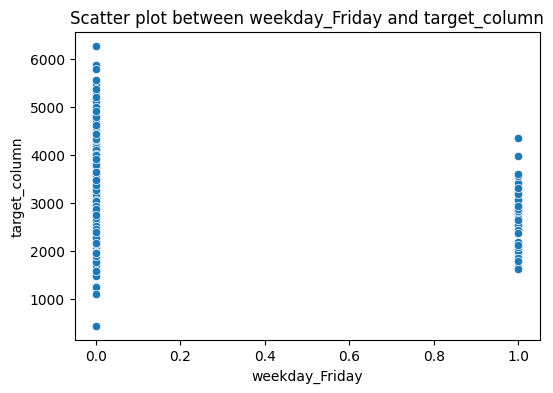

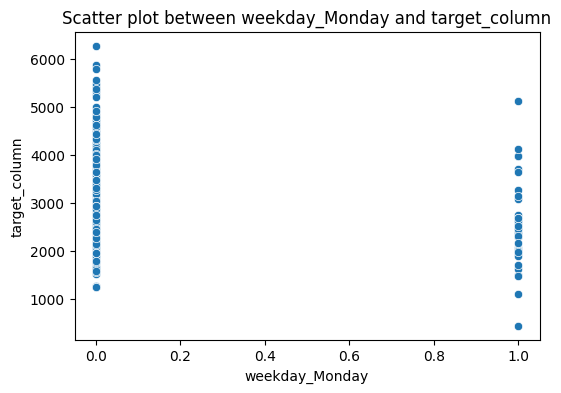

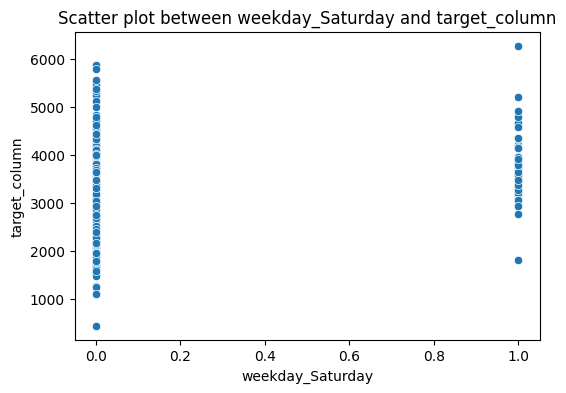

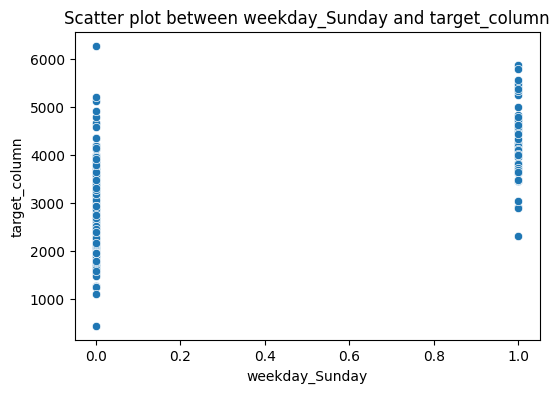

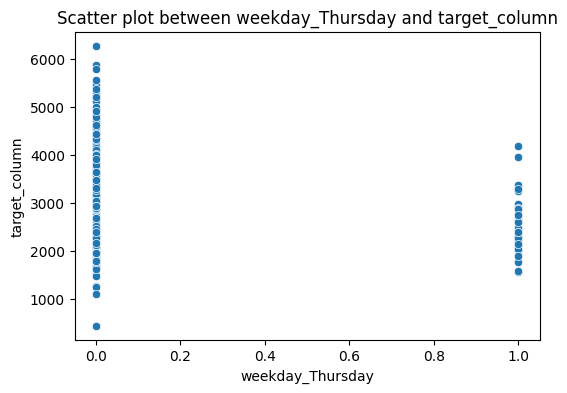

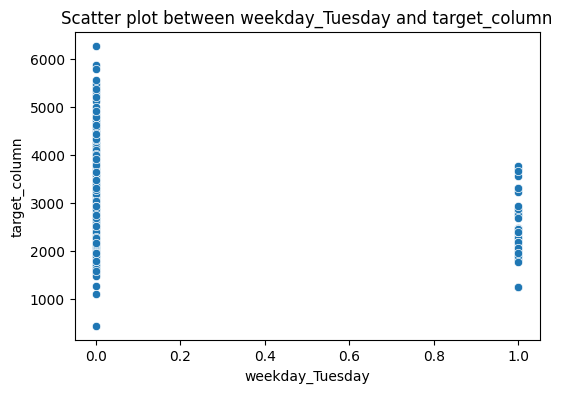

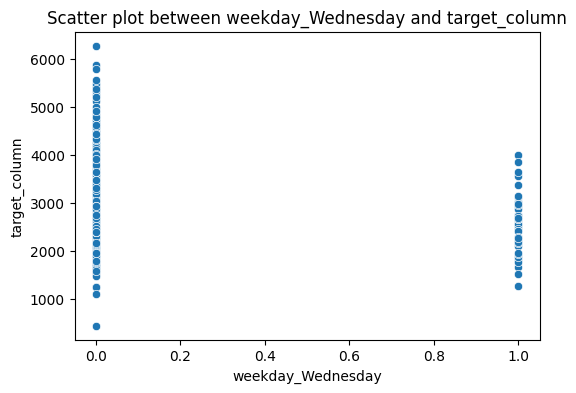

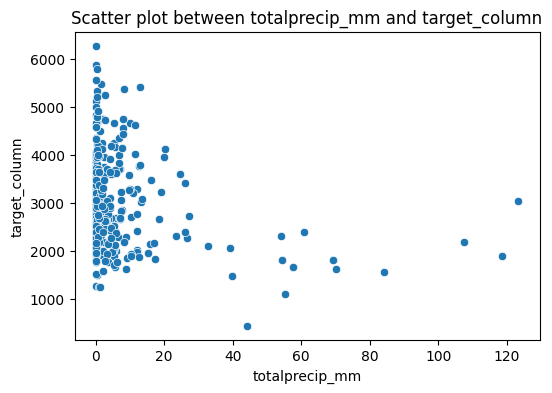

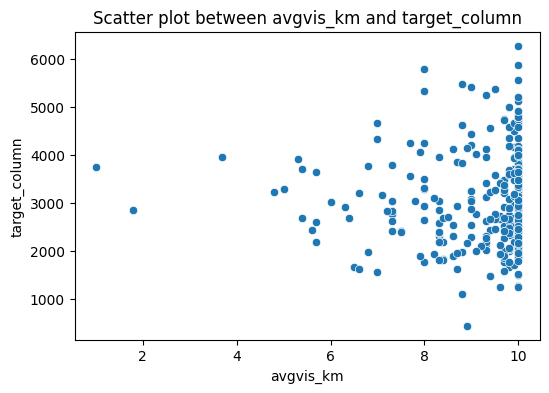

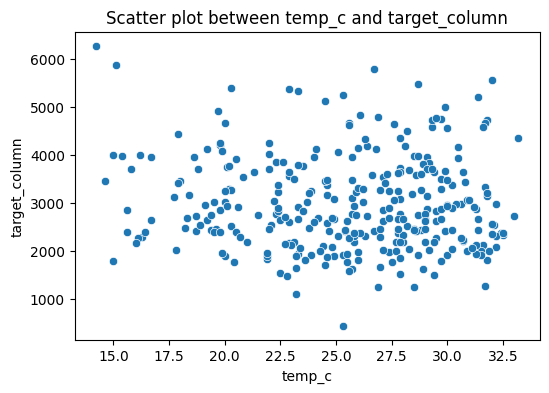

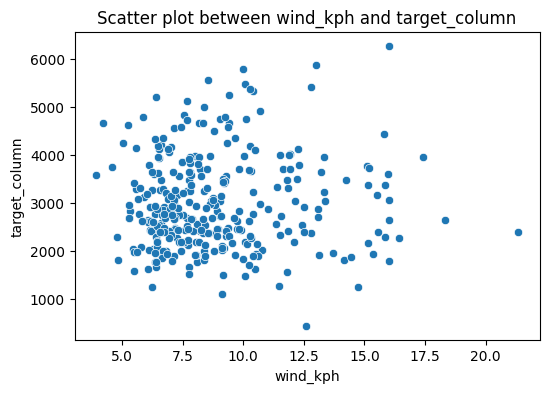

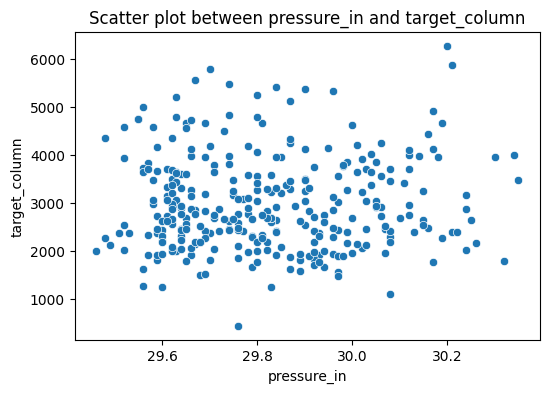

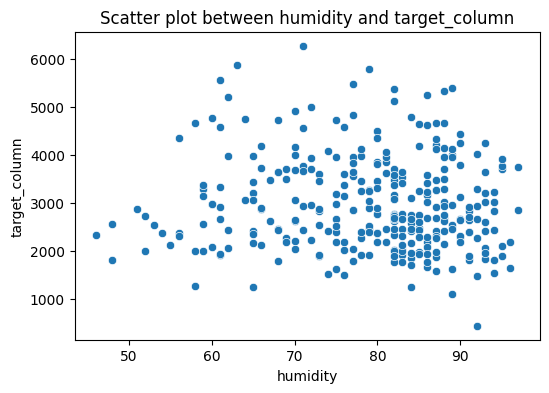

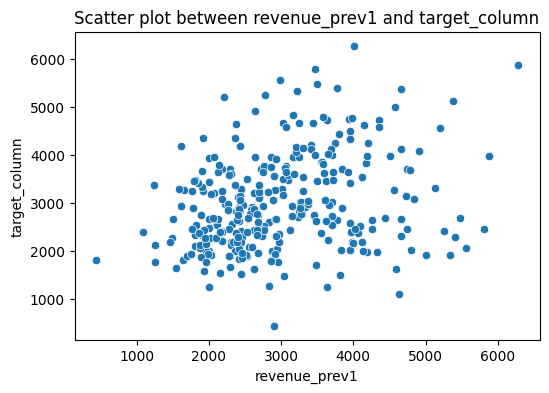

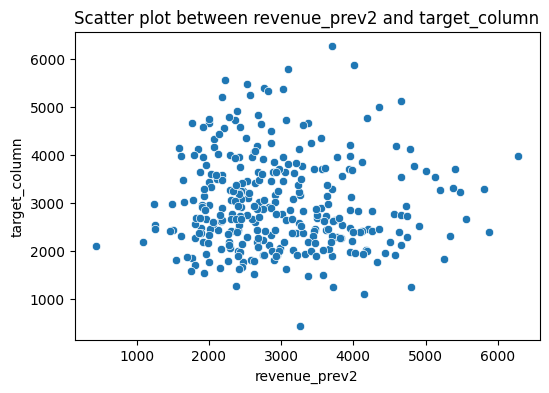

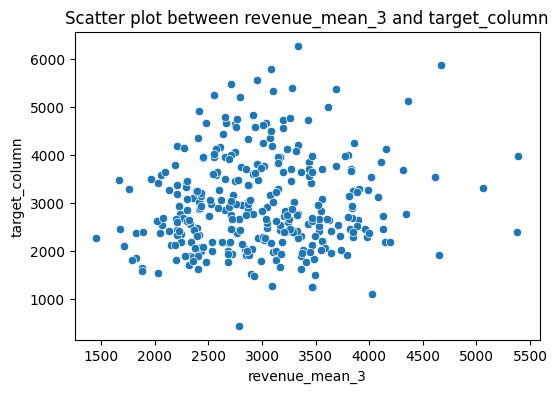

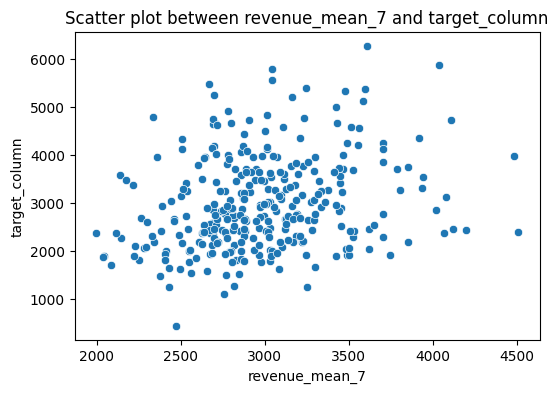

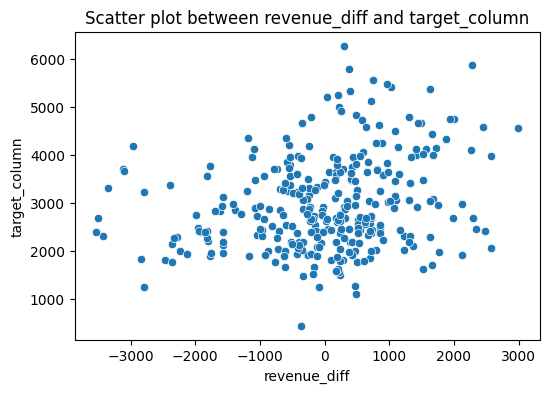

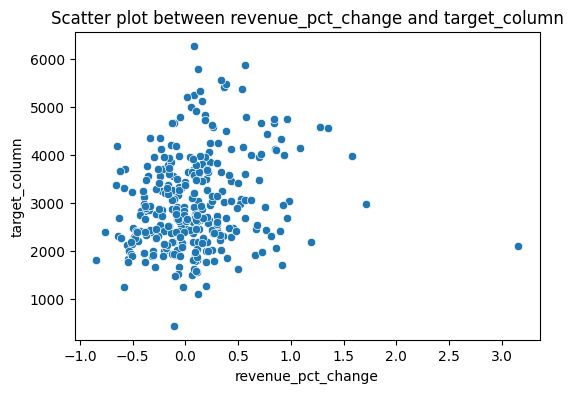

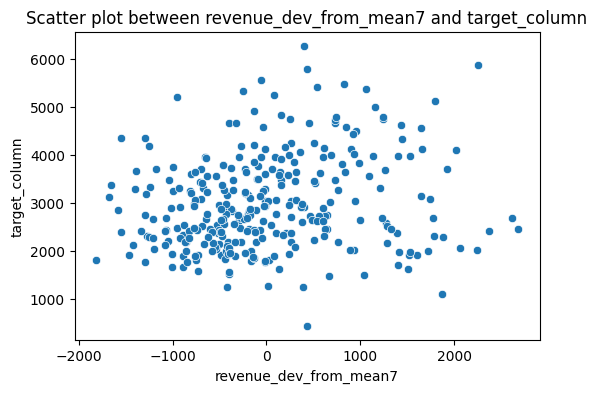

In [5]:
target='revenue'
features=df.drop(columns=target)


for feature in features.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Scatter plot between {feature} and target_column')
    plt.xlabel(feature)
    plt.ylabel('target_column')
    plt.show()


<class 'numpy.ndarray'>


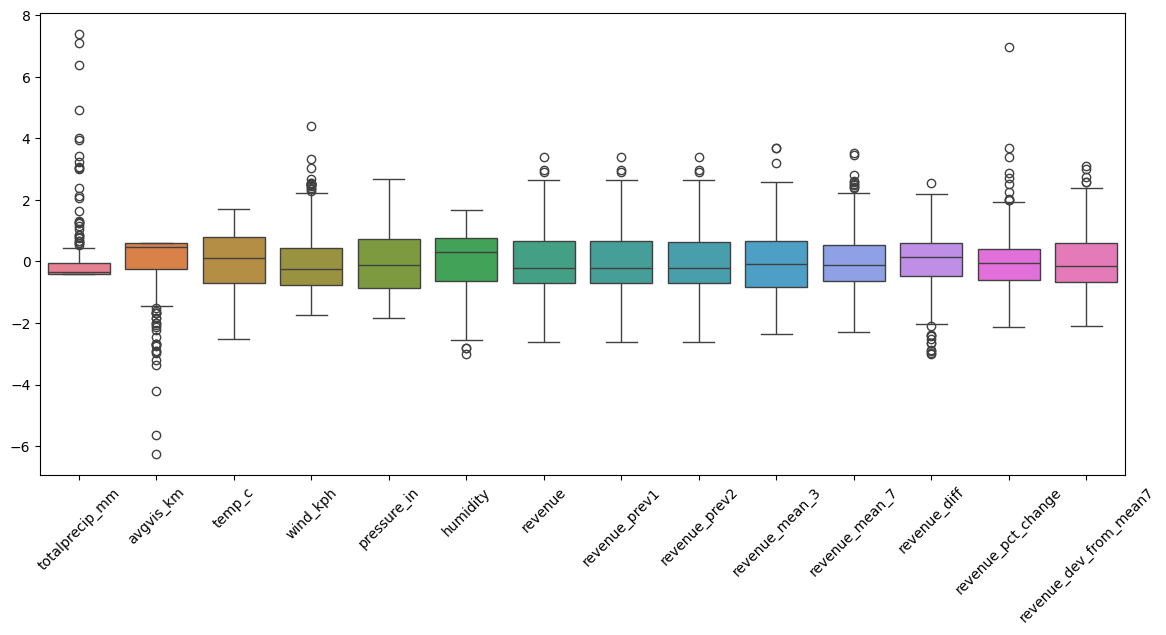

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaled=scaler.fit_transform(df[numeric_columns])
print(type(scaled))
scaled_df=pd.DataFrame(scaled, columns=numeric_columns)

plt.figure(figsize=(14,6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45)
plt.show()

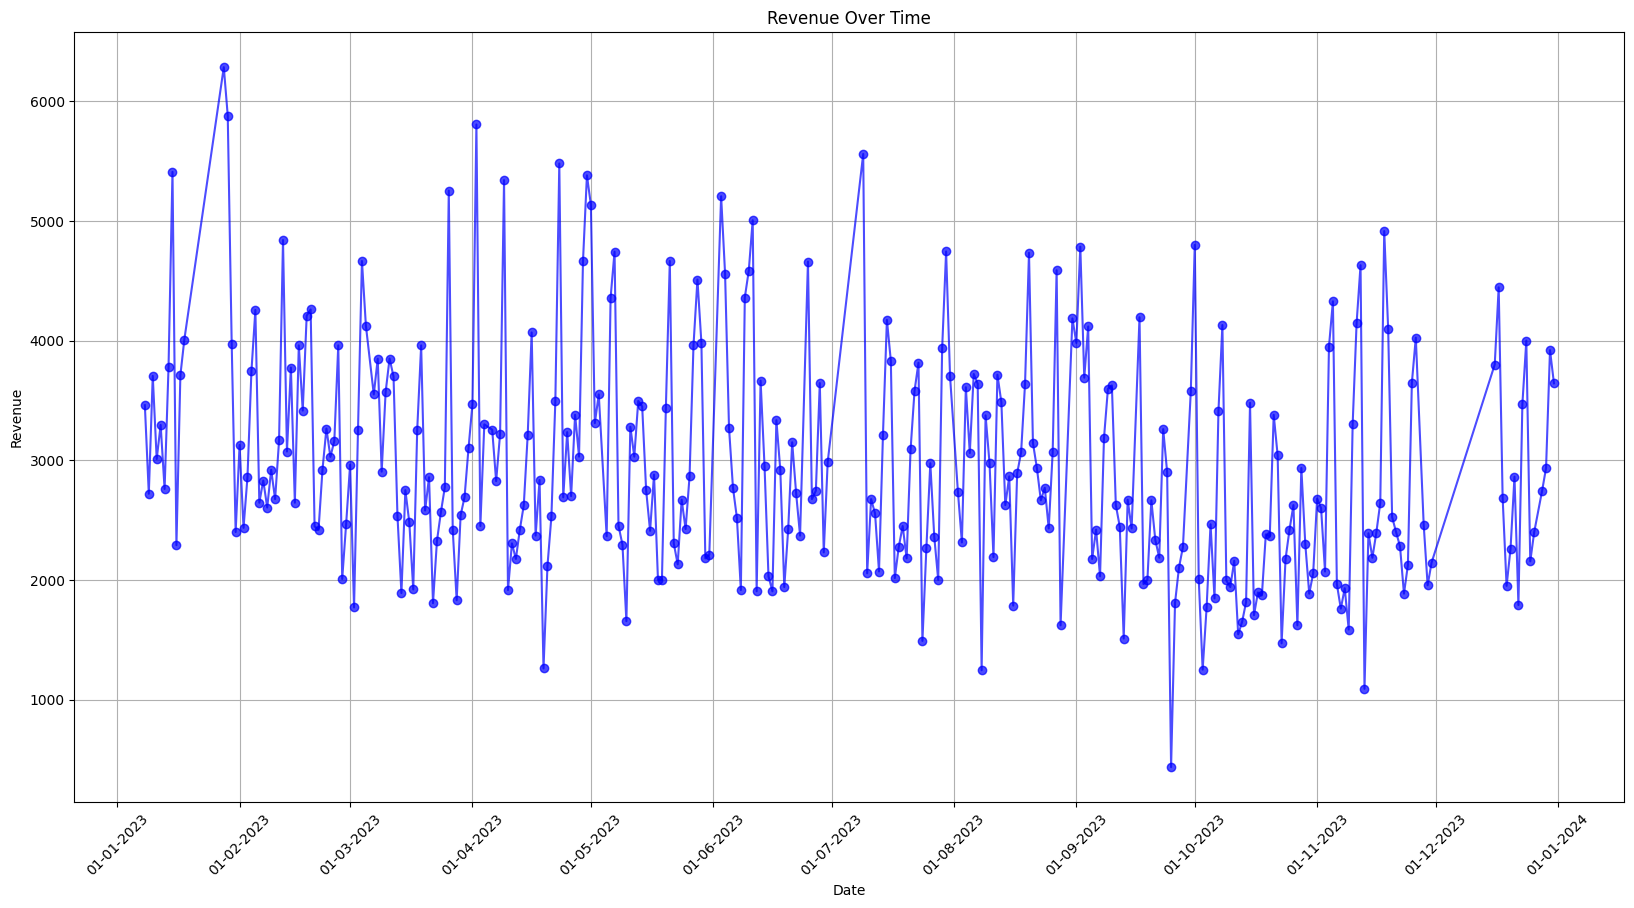

In [ ]:

import matplotlib.dates as mdates
# Giả sử df có cột 'date' và 'revenue'
# Chuyển đổi cột 'date' thành định dạng datetime nếu cần
df['date'] = pd.to_datetime(df['date'])

# Vẽ đồ thị
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['revenue'], color='blue', marker='o', linestyle='-', alpha=0.7)
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Xoay trục X để dễ đọc

# Giãn cách các nhãn trục X (nếu cần)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Đặt giãn cách theo tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Định dạng ngày
plt.grid(True)
plt.show()
